In [1]:
#Importação das bibliotecas necessárias para rodar o código
%matplotlib inline

import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import re
import Augmentor

In [2]:
#Define o mapa de cores para geração da máscara
def colorir(cat):
    h, w = cat.shape[:2]
    msk = np.zeros((h,w,3), dtype = 'uint8')
    msk[cat == 1] = [0,255,0]
    return(msk)

In [40]:
#Definição das pastas necessárias para rodar o script
img_dir = '../../Datasets/SoybeanTS/SP/' 
s_dir = '../../Datasets/SoybeanTS/Recortess/'

anotacao = '../data/SP_pred_VIA.csv'

In [41]:
#Apresenta as imagens dentro do diretório com o respectivo formato da imagem
img_list = os.listdir(img_dir)
img_list = [v for v in img_list if v.endswith('.JPG')]
img_list = sorted(img_list)
print(len(img_list))

70


In [43]:
csv_file = pd.read_csv(anotacao,index_col = False) #Faz a leitura do arquivo .csv
s = 32

images = []
for img in img_list:
    lista = csv_file[csv_file.filename == img] #Recebe os dados encontrados dentro do csv para a imagem em questão
    tamanho = lista.shape

    if tamanho[0] > 1:
        imagem = cv2.imread(os.path.join(img_dir, img)) #Carrega a imagem em questão


        if tamanho[0] > 1:
            print(img)
            for i in range(tamanho[0]):
                if np.random.rand() > 0.99:
                    line = lista.iloc[i,:] #Recebe todas as marcações realizadas dentro daquela imagem
                    region_shape = line.region_shape_attributes #Informa a posição onde o ponto se encontra
                    region_attributes = (line.region_attributes) #Informa a classe do ponto
                    region_attributes = re.findall('"([^"]*)"', region_attributes) #Faz a separação para encontrar a qual classe pertence o ponto marcado
                    coords = [float(s) for s in re.findall(r'-?\d+\.?\d*', region_shape)] #Encontrando valores de x e y
                    cx = int(coords[0]) #Coordenadas no eixo X
                    cy = int(coords[1]) #Coordenadas no eixo y
                    cx = np.clip(cx, s, imagem.shape[0] - s)
                    cy = np.clip(cy, s, imagem.shape[1] - s)

                    im = imagem[(cy-s) : (cy+s),(cx-s) : (cx+s)]
                    im_name = os.path.join(s_dir, img.replace('.JPG', '_{0:06d}.jpg'.format(i))) #Faz a junção do diretório com o nome da imagem, alterando seu formato
                    print(im_name)
                    cv2.imwrite(im_name, im) 
        


DJI_0187.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0187_000109.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000190.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000208.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000437.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000455.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000512.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000539.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0187_000588.jpg
DJI_0188.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0188_000204.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000346.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000374.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000395.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000782.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000887.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000932.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0188_000976.jpg
DJI_0189.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0189_000066.jpg
../../Datasets/SoybeanTS/R

DJI_0220.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0220_000116.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0220_000228.jpg
DJI_0225.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0225_000000.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000069.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000112.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000218.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000228.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000245.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000317.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000377.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000526.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000743.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000770.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000823.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000874.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_000918.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0225_001051.jpg
../../Datasets/SoybeanTS/Recortess/DJI_

DJI_0239.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0239_000070.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000197.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000217.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000240.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000307.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000523.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000549.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000556.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000575.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000622.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000771.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_000948.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001028.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001066.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001123.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001162.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001182.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0239_001192.j

DJI_0261.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0261_000058.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000071.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000174.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000230.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000491.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000520.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000587.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000594.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000686.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000707.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000783.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000932.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000963.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_000984.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_001059.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_001060.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_001123.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0261_001209.j

DJI_0277.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0277_000011.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000028.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000058.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000083.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000180.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000249.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000319.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000375.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000548.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000751.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_000854.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001279.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001325.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001522.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001639.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001873.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001883.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0277_001888.j

DJI_0290.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0290_000222.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000263.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000349.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000717.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000786.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000897.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_000975.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001089.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001095.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001109.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001174.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001243.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001341.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001345.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001351.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001370.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001401.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0290_001438.j

DJI_0297.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0297_000096.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000118.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000245.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000557.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000632.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000698.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000709.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000871.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000920.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000938.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_000977.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001008.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001053.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001184.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001193.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001228.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001235.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0297_001629.j

DJI_0378.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0378_000049.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000196.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000282.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000412.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000428.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000584.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000592.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000800.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0378_000875.jpg
DJI_0379.JPG
../../Datasets/SoybeanTS/Recortess/DJI_0379_000006.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000319.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000327.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000475.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000492.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000557.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000748.jpg
../../Datasets/SoybeanTS/Recortess/DJI_0379_000752.jpg
../../Datasets/SoybeanTS/Recortess/DJI_

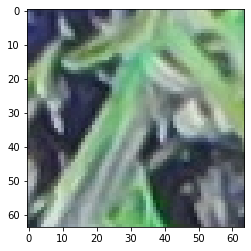

In [44]:
plt.imshow(im)